In [5]:
import pandas as pd
import numpy as np

In [6]:
calls_df = pd.read_csv('C:\\Users\\sanjo\\Desktop\\SKYHACK\\calls.csv')
customers_df = pd.read_csv('C:\\Users\\sanjo\\Desktop\\SKYHACK\\customers.csv')
reason_df = pd.read_csv('C:\\Users\\sanjo\\Desktop\\SKYHACK\\reason.csv')
sentiment_df = pd.read_csv('C:\\Users\\sanjo\\Desktop\\SKYHACK\\sentiment.csv')

In [7]:
print(calls_df.head())
print(customers_df.head())
print(reason_df.head())
print(sentiment_df.head())

      call_id  customer_id  agent_id  call_start_datetime  \
0  4667960400   2033123310    963118  2024-07-31 23:56:00   
1  1122072124   8186702651    519057  2024-08-01 00:03:00   
2  6834291559   2416856629    158319  2024-07-31 23:59:00   
3  2266439882   1154544516    488324  2024-08-01 00:05:00   
4  1211603231   5214456437    721730  2024-08-01 00:04:00   

  agent_assigned_datetime    call_end_datetime  \
0     2024-08-01 00:03:00  2024-08-01 00:34:00   
1     2024-08-01 00:06:00  2024-08-01 00:18:00   
2     2024-08-01 00:07:00  2024-08-01 00:26:00   
3     2024-08-01 00:10:00  2024-08-01 00:17:00   
4     2024-08-01 00:14:00  2024-08-01 00:23:00   

                                     call_transcript  AHT_inSeconds  \
0  \n\nAgent: Thank you for calling United Airlin...         1860.0   
1  \n\nAgent: Thank you for calling United Airlin...          720.0   
2  \n\nAgent: Thank you for calling United Airlin...         1140.0   
3  \n\nAgent: Thank you for calling United Airli

In [8]:
# print(calls_df.info())
# print(customers_df.info())
# print(reason_df.info())
# print(sentiment_df.info())

# Summary statistics
# print(calls_df.describe())

# Check for missing values
# print(calls_df.isnull().sum())
# print(customers_df.isnull().sum())
# print(reason_df.isnull().sum())
# print(sentiment_df.isnull().sum())

# print("Missing values in 'customers.csv':")
# print(customers_df['elite_level_code'].isnull().sum())

# print("\nMissing values in 'sentiment.csv':")
# print(sentiment_df[['agent_tone', 'average_sentiment']].isnull().sum())

In [9]:
customers_df['elite_level_code'] = customers_df['elite_level_code'].fillna('NaN')
customers_df.to_csv('C:\\Users\\sanjo\\Desktop\\SKYHACK\\customers.csv', index=False)

sentiment_df['agent_tone'] = sentiment_df['agent_tone'].fillna('neutral')
# sentiment_df.to_csv('C:\\Users\\sanjo\\Desktop\\SKYHACK\\sentiment.csv', index=False)
# print(f"Original number of rows: {len(sentiment_df)}")
sentiment_df = sentiment_df.dropna(subset=['average_sentiment'])
# print(f"after drop number of rows: {len(sentiment_df)}")

sentiment_df.to_csv('C:\\Users\\sanjo\\Desktop\\SKYHACK\\sentiment.csv', index=False)


calls_df['call_start_datetime'] = pd.to_datetime(calls_df['call_start_datetime'])
calls_df['agent_assigned_datetime'] = pd.to_datetime(calls_df['agent_assigned_datetime'])
calls_df['call_end_datetime'] = pd.to_datetime(calls_df['call_end_datetime'])

calls_df['AHT_inSeconds'] = (calls_df['call_end_datetime'] - calls_df['agent_assigned_datetime']).dt.total_seconds()
calls_df['AST_inSeconds'] = (calls_df['agent_assigned_datetime'] - calls_df['call_start_datetime']).dt.total_seconds()
# print(calls_df[['AHT_inSeconds', 'AST_inSeconds']].head())
# calls_df.to_csv('C:\\Users\\sanjo\\Desktop\\SKYHACK\\calls.csv', index=False)

# Merge calls and reason datasets on 'call_id'
merged_df = pd.merge(calls_df, reason_df, on='call_id', how='left')

# Merge with sentiment data
merged_df = pd.merge(merged_df, sentiment_df, on='call_id', how='left')

# Merge with customers data
merged_df = pd.merge(merged_df, customers_df, on='customer_id', how='left')

# Check the merged data
print(merged_df.head())

# merged_df.to_csv('C:\\Users\\sanjo\\Desktop\\SKYHACK\\merged.csv', index=False)

      call_id  customer_id  agent_id_x call_start_datetime  \
0  4667960400   2033123310      963118 2024-07-31 23:56:00   
1  1122072124   8186702651      519057 2024-08-01 00:03:00   
2  6834291559   2416856629      158319 2024-07-31 23:59:00   
3  2266439882   1154544516      488324 2024-08-01 00:05:00   
4  1211603231   5214456437      721730 2024-08-01 00:04:00   

  agent_assigned_datetime   call_end_datetime  \
0     2024-08-01 00:03:00 2024-08-01 00:34:00   
1     2024-08-01 00:06:00 2024-08-01 00:18:00   
2     2024-08-01 00:07:00 2024-08-01 00:26:00   
3     2024-08-01 00:10:00 2024-08-01 00:17:00   
4     2024-08-01 00:14:00 2024-08-01 00:23:00   

                                     call_transcript  AHT_inSeconds  \
0  \n\nAgent: Thank you for calling United Airlin...         1860.0   
1  \n\nAgent: Thank you for calling United Airlin...          720.0   
2  \n\nAgent: Thank you for calling United Airlin...         1140.0   
3  \n\nAgent: Thank you for calling United Airli

In [10]:
avg_aht = merged_df['AHT_inSeconds'].mean()
avg_ast = merged_df['AST_inSeconds'].mean()
print(f"Overall Average Handle Time (AHT): {avg_aht:.2f} seconds")
print(f"Overall Average Speed to Answer (AST): {avg_ast:.2f} seconds")


Overall Average Handle Time (AHT): 697.05 seconds
Overall Average Speed to Answer (AST): 437.07 seconds


In [11]:
# Group by call reason and calculate AHT and AST

merged_df['primary_call_reason'] = merged_df['primary_call_reason'].str.strip()
merged_df['primary_call_reason'] = merged_df['primary_call_reason'].str.replace(r'\s+', ' ', regex=True)
merged_df['primary_call_reason'] = merged_df['primary_call_reason'].replace({
    'Check In': 'Check-In',  # Standardize to 'Check-In'
    'Post Flight': 'Post-Flight',  # Standardize to 'Post-Flight'
    'Products & Services': 'Products and Services'  # Standardize to 'Products and Services'
})
groupAvgReason = merged_df.groupby('primary_call_reason').agg({
    'AHT_inSeconds': 'mean',
    'AST_inSeconds': 'mean',
    'call_id': 'count'
}).reset_index()

# Rename columns for clarity
groupAvgReason.columns = ['primary_call_reason', 'Avg_AHT_seconds', 'Avg_AST_seconds', 'Total_Calls']


print(groupAvgReason)


      primary_call_reason  Avg_AHT_seconds  Avg_AST_seconds  Total_Calls
0                 Baggage       333.644068       542.097458         2832
1                 Booking       427.736064       240.227531         2637
2                Check-In       574.128151       355.840336         1904
3                Checkout      1016.853814       724.703390         1888
4          Communications       826.718750       239.968750         3840
5         Digital Support       372.293878       505.714286         1225
6              Disability       292.109181       503.523573          403
7                     ETC       962.899160       544.285714          952
8                  IRROPS       785.116069       360.081136        13311
9            Mileage Plus       995.573406       361.015211         5851
10           Other Topics       350.097800       238.753056          818
11            Post-Flight       932.896074       569.431871         4330
12  Products and Services       746.560624       30

In [12]:
print(groupAvgReason['Total_Calls'].sum())

66653


In [13]:
groupAvgReason.to_csv('C:\\Users\\sanjo\\Desktop\\SKYHACK\\groupAvgReason.csv', index=False)

In [14]:
maxi_total_calls_row = groupAvgReason.loc[groupAvgReason['Total_Calls'].idxmax()]
mini_total_calls_row = groupAvgReason.loc[groupAvgReason['Total_Calls'].idxmin()]

In [15]:
maxi_avg_aht_seconds = maxi_total_calls_row['Avg_AHT_seconds']
mini_avg_aht_seconds = mini_total_calls_row['Avg_AHT_seconds']

In [16]:
Perct_diff = ((maxi_avg_aht_seconds - mini_avg_aht_seconds)/((maxi_avg_aht_seconds + mini_avg_aht_seconds)/2)) * 100

In [17]:
# Perct_diff #Answer Number 1
print(f"Percentage Difference: {Perct_diff:.2f}%")

Percentage Difference: 40.77%


In [18]:
# Example using IQR to identify outliers for AHT
Q1 = groupAvgReason['Avg_AHT_seconds'].quantile(0.25)
Q3 = groupAvgReason['Avg_AHT_seconds'].quantile(0.75)
IQR = Q3 - Q1
outliers_aht = groupAvgReason[(groupAvgReason['Avg_AHT_seconds'] < (Q1 - 2 * IQR)) | 
                               (groupAvgReason['Avg_AHT_seconds'] > (Q3 + 2 * IQR))]


print("Outliers in Average AHT:")
print(outliers_aht[['primary_call_reason', 'Avg_AHT_seconds']])


Outliers in Average AHT:
Empty DataFrame
Columns: [primary_call_reason, Avg_AHT_seconds]
Index: []


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt



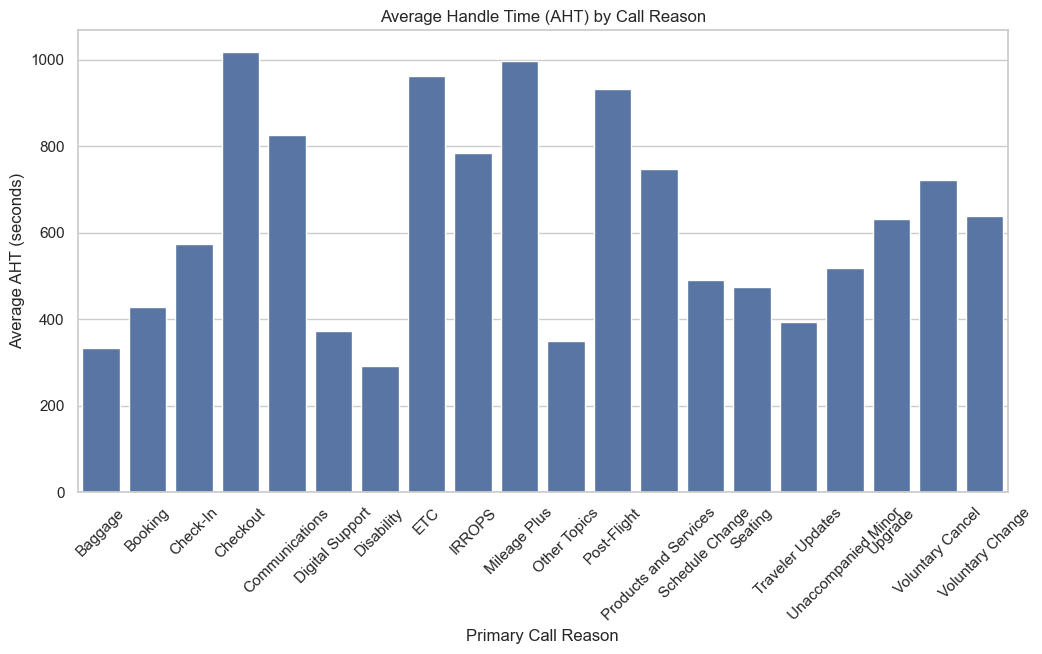

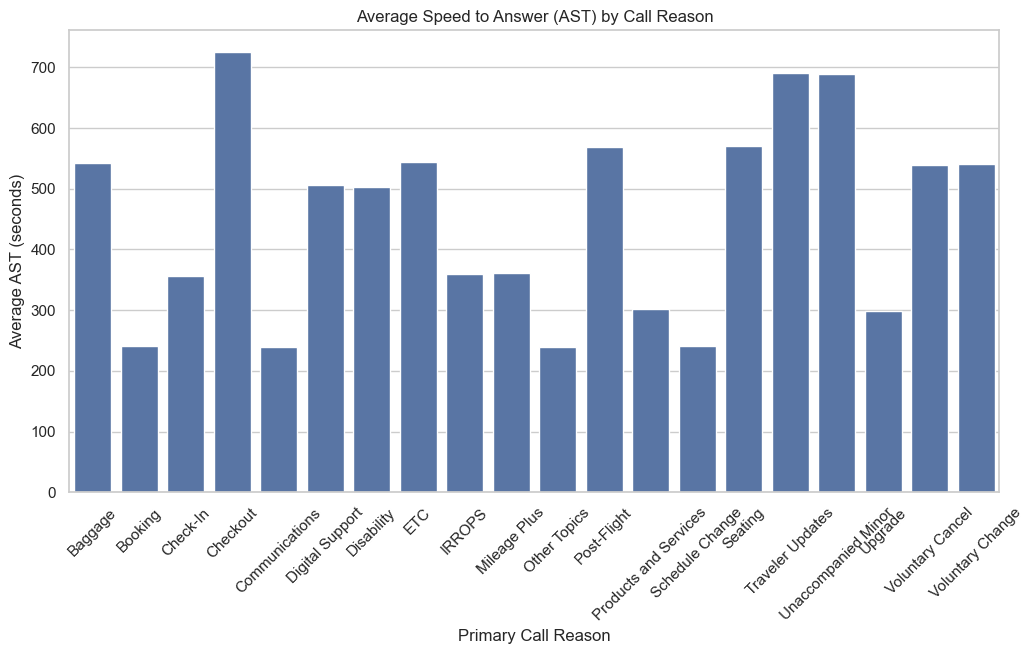

In [20]:
sns.set(style='whitegrid')

# Bar plot for AHT by call reason
plt.figure(figsize=(12, 6))
sns.barplot(data=groupAvgReason, x='primary_call_reason', y='Avg_AHT_seconds')
plt.title('Average Handle Time (AHT) by Call Reason')
plt.xticks(rotation=45)
plt.xlabel('Primary Call Reason')
plt.ylabel('Average AHT (seconds)')
plt.show()

# Bar plot for AST by call reason
plt.figure(figsize=(12, 6))
sns.barplot(data=groupAvgReason, x='primary_call_reason', y='Avg_AST_seconds')
plt.title('Average Speed to Answer (AST) by Call Reason')
plt.xticks(rotation=45)
plt.xlabel('Primary Call Reason')
plt.ylabel('Average AST (seconds)')
plt.show()

In [23]:
agent_performance = merged_df.groupby('agent_id_x')['AHT_inSeconds'].mean().sort_values(ascending=False)

# Display the agents with the highest average handle time
print(agent_performance.head())

agent_id_x
102574    3600.0
506130    2880.0
140146    2620.0
255256    2620.0
558705    1980.0
Name: AHT_inSeconds, dtype: float64


In [24]:
agent_tone_analysis = merged_df.groupby('agent_tone')['AHT_inSeconds'].mean().sort_values(ascending=False)

# Display the average AHT for different agent tones
print(agent_tone_analysis)

agent_tone
neutral       748.832641
calm          626.499696
frustrated    617.068404
angry         394.395887
polite        220.000000
Name: AHT_inSeconds, dtype: float64


In [25]:
call_type_analysis = merged_df.groupby('primary_call_reason')['AHT_inSeconds'].mean().sort_values(ascending=False)
print(call_type_analysis.head())


primary_call_reason
Checkout          1016.853814
Mileage Plus       995.573406
ETC                962.899160
Post-Flight        932.896074
Communications     826.718750
Name: AHT_inSeconds, dtype: float64


In [26]:
customer_tone_analysis = merged_df.groupby('customer_tone')['AHT_inSeconds'].mean().sort_values(ascending=False)
print(customer_tone_analysis)


customer_tone
neutral       707.969227
calm          699.991621
angry         695.929942
frustrated    692.927858
polite        690.081584
Name: AHT_inSeconds, dtype: float64


In [28]:
sentiment_correlation = merged_df[['average_sentiment', 'AHT_inSeconds']].corr()
print(sentiment_correlation)


                   average_sentiment  AHT_inSeconds
average_sentiment           1.000000      -0.076065
AHT_inSeconds              -0.076065       1.000000
